In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split, ShuffleSplit, learning_curve, GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.metrics import roc_curve, accuracy_score, confusion_matrix, classification_report, roc_auc_score, make_scorer, precision_recall_curve, average_precision_score 
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier, IsolationForest, VotingClassifier
from sklearn.neural_network import MLPClassifier

In [3]:
df = pd.read_csv('Breast_Cancer.csv')

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

### Convert target variable to numerical

In [6]:
df = pd.get_dummies(data = df, columns=['diagnosis'], drop_first = True)

### Determine Outliers for features

In [7]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


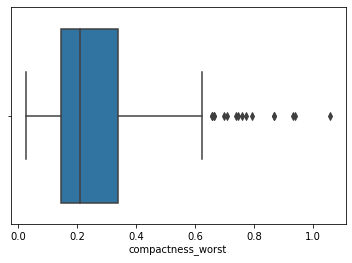

In [8]:
sns.boxplot(df.compactness_worst)

In [9]:
uv = np.percentile(df.compactness_worst, [97] [0])
uv

0.6161840000000002

In [10]:
df[df.compactness_worst > uv]

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
9,84501001,12.46,24.04,83.97,475.9,0.11860,0.2396,0.2273,0.08543,0.2030,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,1
14,84667401,13.73,22.61,93.60,578.3,0.11310,0.2293,0.2128,0.08025,0.2069,...,32.01,108.80,697.7,0.1651,0.7725,0.6943,0.2208,0.3596,0.14310,1
15,84799002,14.54,27.54,96.73,658.8,0.11390,0.1595,0.1639,0.07364,0.2303,...,37.13,124.10,943.2,0.1678,0.6577,0.7026,0.1712,0.4218,0.13410,1
26,852763,14.58,21.53,97.41,644.8,0.10540,0.1868,0.1425,0.08783,0.2252,...,33.21,122.40,896.9,0.1525,0.6643,0.5539,0.2701,0.4264,0.12750,1
33,854002,19.27,26.47,127.90,1162.0,0.09401,0.1719,0.1657,0.07593,0.1853,...,30.90,161.40,1813.0,0.1509,0.6590,0.6091,0.1785,0.3672,0.11230,1
42,855625,19.07,24.81,128.30,1104.0,0.09081,0.2190,0.2107,0.09961,0.2310,...,33.17,177.40,1651.0,0.1247,0.7444,0.7242,0.2493,0.4670,0.10380,1
62,858986,14.25,22.15,96.42,645.7,0.10490,0.2008,0.2135,0.08653,0.1949,...,29.51,119.10,959.5,0.1640,0.6247,0.6922,0.1785,0.2844,0.11320,1
72,859717,17.20,24.52,114.20,929.4,0.10710,0.1830,0.1692,0.07944,0.1927,...,33.82,151.60,1681.0,0.1585,0.7394,0.6566,0.1899,0.3313,0.13390,1


"compactness_worst" field has outlier values beyond 97 percentile, so we can modify them with 97% value

In [11]:
df.compactness_worst[(df.compactness_worst > uv)] = uv

/Users/rameshveer/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


After modifying, we can see in below plot that no outlier present for this field

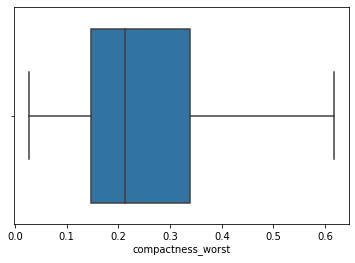

In [12]:
sns.boxplot(df.compactness_worst)

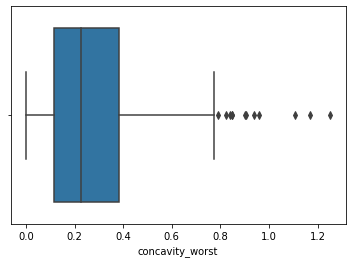

In [13]:
sns.boxplot(df.concavity_worst)

In [14]:
uv = np.percentile(df.concavity_worst, [98] [0])
uv

0.7832599999999998

In [15]:
df[df.concavity_worst > uv]

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
9,84501001,12.460,24.04,83.97,475.9,0.11860,0.2396,0.2273,0.08543,0.2030,...,40.68,97.65,711.4,0.1853,0.616184,1.1050,0.2210,0.4366,0.20750,1
68,859471,9.029,17.33,58.79,250.5,0.10660,0.1413,0.3130,0.04375,0.2111,...,22.65,65.50,324.7,0.1482,0.436500,1.2520,0.1750,0.4228,0.11750,0
108,86355,22.270,19.67,152.80,1509.0,0.13260,0.2768,0.4264,0.18230,0.2556,...,28.01,206.80,2360.0,0.1701,0.616184,0.9608,0.2910,0.4055,0.09789,1
152,8710441,9.731,15.34,63.78,300.2,0.10720,0.1599,0.4108,0.07857,0.2548,...,19.49,71.04,380.5,0.1292,0.277200,0.8216,0.1571,0.3108,0.12590,0
190,874858,14.220,23.12,94.37,609.9,0.10750,0.2413,0.1981,0.06618,0.2384,...,37.18,106.40,762.4,0.1533,0.616184,0.8488,0.1772,0.5166,0.14460,1
202,878796,23.290,26.67,158.90,1685.0,0.11410,0.2084,0.3523,0.16200,0.2200,...,32.68,177.00,1986.0,0.1536,0.416700,0.7892,0.2733,0.3198,0.08762,1
252,885429,19.730,19.82,130.70,1206.0,0.10620,0.1849,0.2417,0.09740,0.1733,...,25.59,159.80,1933.0,0.1710,0.595500,0.8489,0.2507,0.2749,0.12970,1
379,9013838,11.080,18.83,73.30,361.6,0.12160,0.2154,0.1689,0.06367,0.2196,...,32.82,91.76,508.1,0.2184,0.616184,0.8402,0.2524,0.4154,0.14030,1
400,90439701,17.910,21.02,124.40,994.0,0.12300,0.2576,0.3189,0.11980,0.2113,...,27.78,149.60,1304.0,0.1873,0.591700,0.9034,0.1964,0.3245,0.11980,1
430,907914,14.900,22.53,102.10,685.0,0.09947,0.2225,0.2733,0.09711,0.2041,...,27.57,125.40,832.7,0.1419,0.616184,0.9019,0.2475,0.2866,0.11550,1


"compactness_worst" field has outlier values beyond 97 percentile, so we can modify them with 97% value

In [16]:
df.concavity_worst[(df.concavity_worst > uv)] = uv

/Users/rameshveer/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


After modifying, we can see in below plot that no outlier present for this field

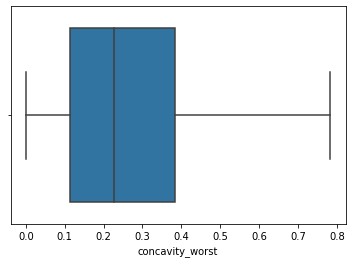

In [17]:
sns.boxplot(df.concavity_worst)

Distribution of diagnosis field ("Malignant - 1 / Benign - 0") :

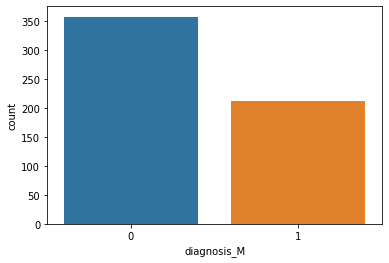

In [18]:
sns.countplot(x = df['diagnosis_M'])

In [19]:
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.616184,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.186600,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.424500,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.616184,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.205000,0.4000,0.1625,0.2364,0.07678,1


#### Model training and test dataset
  The following code blocks splits the dataset into trainig and testing datasets by applying 80-20 rule.
    Training data - 80%
    Test data - 20%

In [20]:
X = df.drop(["diagnosis_M"], axis=1)
y = df.diagnosis_M

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

X_train.shape

(455, 31)

# Model Construction

    The following code blocks construct the Machine Learning models using the training dataset

## Generic Class to run any Classification Models

In [22]:
class Clf_Mod:
    
    def __init__(self, model, #### model is a method which we are going to use for detecting FRAUDS. For example: sklearn.svm
                 X= X_train, y= y_train, test= X_test, ### data
                 **kvars  #### additional key parameters for model
                ):
        self.clf = model( **kvars)
        self.methodname = model.__name__
        self.X_train = X
        self.y_train = y
        self.X_test = test
        self.fit(self.X_train, self.y_train)
        self.predicted = self.predict_val(test)
        
    def fit (self, X, y):
        self.clf.fit(X, y)
    
    def predict_val(self, x):
        return self.clf.predict(x)
       
    def get_score(self, y = y_test, roc = True, params = False):
        accuracy = accuracy_score(self.predicted, y)
        if params:
            print(self.clf.get_params())
        print(self.methodname+ " metrics:\n")
        print(" Accuracy Score: %.2f%%" % (accuracy * 100.0))
        print(" Confusion matrix:", "\n",confusion_matrix(y_true=y, y_pred=self.predicted))
        print( 'Classification report:\n', classification_report(y, self.predicted))
        if roc:
            print(" ROC Score: %.2f%%" % (roc_auc_score(y, self.clf.predict_proba(self.X_test)[:,1])))
        
    def plot_curves(self, y = y_test):   
        plt.figure(figsize=(17, 5))
        plt.subplot(131)
        # Plot the recall precision tradeoff        
        self.plot_pr_curve(y)
        plt.subplot(132)        
        self.plot_lern_curve(accuracy_score)     
        plt.subplot(133)
        self.plot_lern_curve(roc_auc_score)
        plt.show()
        
    def plot_pr_curve(self, y = y_test):
        
        plt.subplot(122)
        # Calculate average precision and the PR curve
        average_precision = average_precision_score(y, self.predicted)

        # Obtain precision and recall 
        precision, recall, _ = precision_recall_curve(y, self.clf.predict_proba(self.X_test)[:,1])
        
        plt.step(recall, precision, where='post')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.ylim([0.0, 1.05])
        plt.xlim([0.0, 1.05])
        plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format( average_precision))
    
    def plot_lern_curve(self, metrics):
        plt.title(self.methodname + " Learning Curves")
        plt.xlabel('Training examples')
        plt.ylabel("{}".format(' '.join(metrics.__name__.split('_')).title()))
        
        train_sizes, train_scores, test_scores = learning_curve(self.clf, self.X_train, self.y_train, n_jobs=-1, 
                                                                cv = ShuffleSplit(n_splits=5, test_size=.25 , random_state = 5), 
                                                                train_sizes=np.linspace(0.5, 1.0, 10), scoring = make_scorer(metrics))
        train_scores_mean = np.mean(train_scores, axis=1) 
        test_scores_mean = np.mean(test_scores, axis=1) 
        #plt.grid()

        plt.plot(train_sizes,  train_scores_mean, 'o-', color="r", label="Training score")
        plt.plot(train_sizes,  test_scores_mean, 'o-', color="g", label="Cross-validation score")
        
        plt.legend(loc="best")
    
    def plot_roc_curve(self, y = y_test, models = None, fig = None):
        fig = plt.figure(figsize=(15, 7))
        ax = fig.add_subplot(121)
        
        self.roc_curves(ax, y, models)
        
        ax.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
        
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        
        plt.legend(loc="best")
        
        #if fig != None:
            #plt.savefig( fig, bbox_inches = 'tight')
       
    def roc_curves(self, p, y, M):
        if M == None:
            fpr, tpr, thresholds = roc_curve(y, self.clf.predict_proba(self.X_test)[:,1] )
            p.plot(fpr, tpr,  label=self.methodname )
        else:
            fpr, tpr, thresholds = roc_curve(y, self.clf.predict_proba(self.X_test)[:,1] )
            p.plot(fpr, tpr,  label=self.methodname )
            for i in M:
                fpr, tpr, thresholds = roc_curve(y, i.clf.predict_proba(i.X_test)[:,1] )
                p.plot(fpr, tpr,  label=i.methodname )

#### Function for serching best parameters which is fiting the model and shows best results for specified method.               
def grid(method, parameters):
    
    grid_1 = GridSearchCV(method, parameters, scoring = make_scorer(accuracy_score), cv=5, n_jobs = -1)
    grid_2 = GridSearchCV(method, parameters, scoring = make_scorer(roc_auc_score), cv=5, n_jobs = -1)
    
    grid_1.fit(X_train, y_train)
    print('Best parameters using accuracy score:')
    print(grid_1.best_params_)

    grid_2.fit(X_train, y_train)
    print('Best parameters usin ROC accuracy score:')
    print(grid_2.best_params_)

### 1. Logistic regression

In [23]:
Log_reg = Clf_Mod(LogisticRegression, 
              penalty= 'l1',
              solver= 'liblinear', class_weight='balanced', random_state = 5 , C = 0.001)

# Get your performance metrics
Log_reg.get_score()

LogisticRegression metrics:

 Accuracy Score: 92.11%
 Confusion matrix: 
 [[72  3]
 [ 6 33]]
Classification report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94        75
           1       0.92      0.85      0.88        39

    accuracy                           0.92       114
   macro avg       0.92      0.90      0.91       114
weighted avg       0.92      0.92      0.92       114

 ROC Score: 0.97%


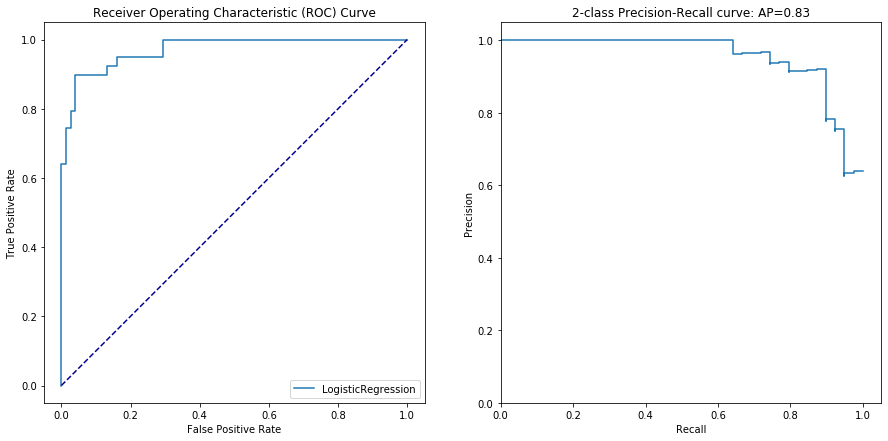

In [24]:
Log_reg.plot_roc_curve()
Log_reg.plot_pr_curve()

### 2. Support Vector Machines(SVM)

In [25]:
# SVM(scaled data)
svm_mod = Clf_Mod(SVC, 
              gamma = 'auto', probability = True, random_state= 5, class_weight= 'balanced', C=1 )

# Get your performance metrics
svm_mod.get_score()

SVC metrics:

 Accuracy Score: 65.79%
 Confusion matrix: 
 [[75  0]
 [39  0]]
Classification report:
               precision    recall  f1-score   support

           0       0.66      1.00      0.79        75
           1       0.00      0.00      0.00        39

    accuracy                           0.66       114
   macro avg       0.33      0.50      0.40       114
weighted avg       0.43      0.66      0.52       114

 ROC Score: 0.49%


/Users/rameshveer/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Plot validation results

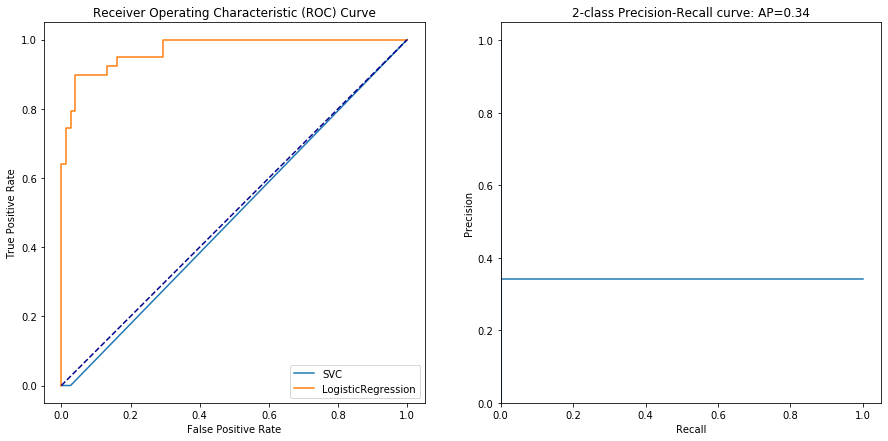

In [26]:
svm_mod.plot_roc_curve(models = [Log_reg])
svm_mod.plot_pr_curve()

### 3. Random Forest Clasifier

In [27]:
### Random Forest Clasifier
# Continue fitting the model and obtain predictions

Random_forest = Clf_Mod(RandomForestClassifier, 
               n_jobs = -1, random_state = 5, class_weight = 'balanced_subsample', 
              min_samples_split = 0.25
             )
 
# Get your performance metrics
Random_forest.get_score() 

RandomForestClassifier metrics:

 Accuracy Score: 95.61%
 Confusion matrix: 
 [[71  4]
 [ 1 38]]
Classification report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97        75
           1       0.90      0.97      0.94        39

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

 ROC Score: 0.99%


### Plot validation results

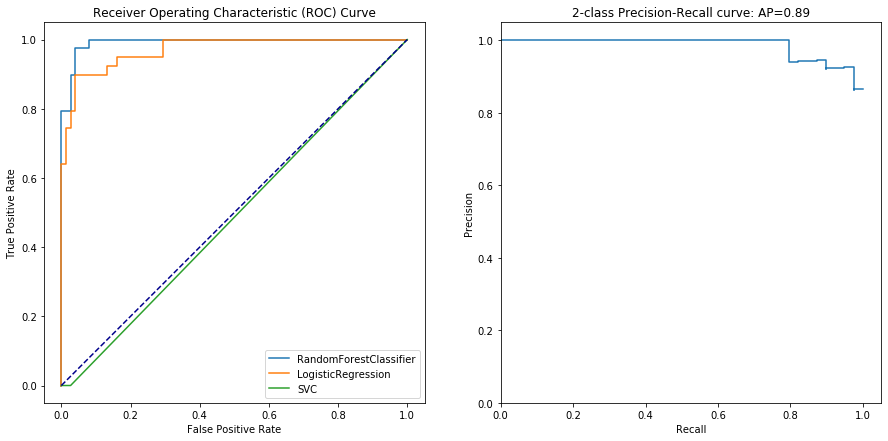

In [28]:
Random_forest.plot_roc_curve(models = [Log_reg, svm_mod])
Random_forest.plot_pr_curve()

### 4. Ensemble method clasifier (log-reg + Random Forest)

In [29]:
### Generate ensemble
Ensemble = Clf_Mod(VotingClassifier, 
              estimators=[ ('lr', Log_reg.clf), ("rf", Random_forest.clf)], voting='soft', n_jobs = -1
             )
 
# Get your performance metrics
Ensemble.get_score()

VotingClassifier metrics:

 Accuracy Score: 95.61%
 Confusion matrix: 
 [[72  3]
 [ 2 37]]
Classification report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97        75
           1       0.93      0.95      0.94        39

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

 ROC Score: 0.99%


* ### Plot validation results

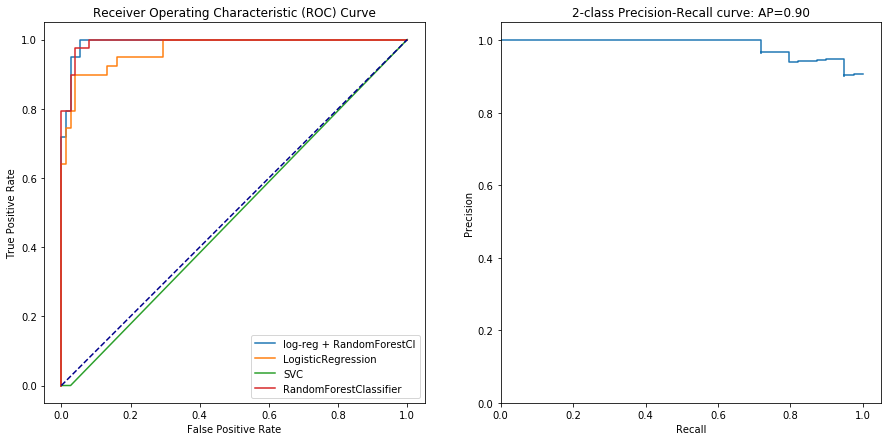

In [30]:
Ensemble.methodname = "log-reg + RandomForestCl"
Ensemble.plot_roc_curve(models = [Log_reg, svm_mod, Random_forest])
Ensemble.plot_pr_curve()

## 5. XGBoost

In [31]:
import xgboost as xgb

In [32]:
xgb_clf = Clf_Mod(xgb.XGBClassifier)

In [33]:
xgb_clf.get_score()

XGBClassifier metrics:

 Accuracy Score: 97.37%
 Confusion matrix: 
 [[73  2]
 [ 1 38]]
Classification report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98        75
           1       0.95      0.97      0.96        39

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

 ROC Score: 1.00%


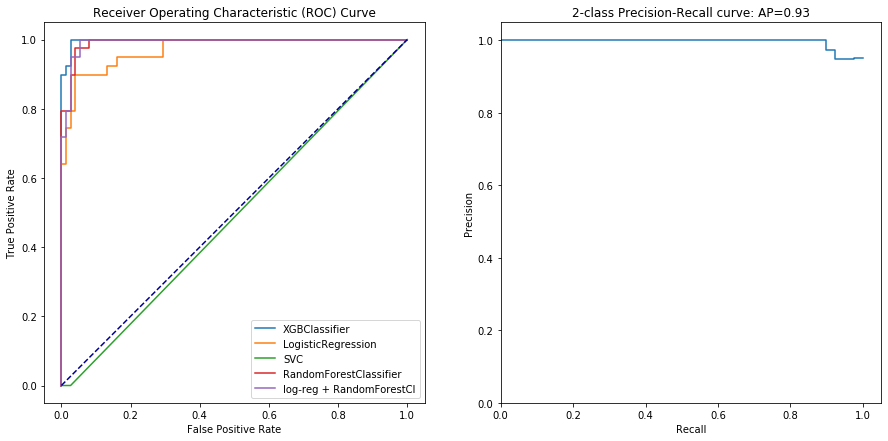

In [34]:
xgb_clf.plot_roc_curve(models = [Log_reg, svm_mod, Random_forest, Ensemble])
xgb_clf.plot_pr_curve()

### Inference:

    Based on ROC & Accuracy score of various models, 
    we can choose #Random Forest/XGBoost for our business case which yeilds best ROC/Accuracy score.
